In [1]:
import statistics as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import random
import math
from keras.regularizers import l1, l2
from keras.regularizers import l1_l2
from keras.callbacks import EarlyStopping, ModelCheckpoint
import time
from collections import Counter
from scipy.signal import find_peaks

In [2]:
FF_df = pd.read_csv('form_factors.csv')
TD_x_df = pd.read_csv('gpr_total_density_x_200.csv')
TD_y_df = pd.read_csv('gpr_total_density_y_200.csv')

FF_df = FF_df.transpose()
TD_x_df = TD_x_df.transpose()
TD_y_df = TD_y_df.transpose()

In [8]:
FF_df

,0,1,2,3,4,5,6,7,8,9,...,603,604,605,606,607,608,609,610,611,612
0,158.700313,23.453699,71.950184,41.881901,26.452318,11.047131,44.099359,32.289559,35.088986,68.905183,...,30.323867,39.633213,15.273621,62.063384,36.709497,120.551176,23.179887,22.873782,77.699142,46.556570
1,158.640037,23.425170,71.915288,41.858587,26.419103,11.022817,44.122664,32.258483,35.045804,68.876884,...,30.286651,39.617226,15.246616,62.023428,36.673243,120.504543,23.152669,22.847299,77.662203,46.532400
2,158.459238,23.339597,71.810614,41.788653,26.319475,10.949886,44.192567,32.165269,34.916287,68.791997,...,30.175019,39.569268,15.165614,61.903579,36.564501,120.364663,23.071029,22.767861,77.551407,46.459897
3,158.158008,23.197017,71.636207,41.672126,26.153484,10.828371,44.309036,32.009958,34.700512,68.650555,...,29.989024,39.489352,15.030651,61.703902,36.383333,120.131606,22.935006,22.635501,77.366811,46.339087
4,157.736499,22.997497,71.392140,41.509050,25.921215,10.658322,44.472015,31.792620,34.398613,68.452611,...,29.728750,39.377495,14.841788,61.424503,36.129841,119.805483,22.744663,22.450279,77.108512,46.170013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,17.310329,3.131684,1.627084,1.268836,6.549238,0.638636,5.765008,8.441597,13.180741,0.440554,...,2.535038,7.959169,0.784373,1.926625,3.712288,2.097589,10.944315,2.326322,0.094115,4.287337
996,17.359571,3.161219,1.696287,1.293176,6.484021,0.574354,5.846652,8.470322,12.958096,0.420413,...,2.529914,7.882230,0.806052,1.846028,3.648188,2.114517,10.943840,2.339834,0.095271,4.316069
997,17.403357,3.190445,1.765104,1.317745,6.417372,0.510177,5.926353,8.496613,12.733305,0.400530,...,2.528256,7.804138,0.827463,1.768341,3.585205,2.130676,10.938560,2.355930,0.096396,4.342577
998,17.441690,3.219298,1.833502,1.342507,6.349330,0.446154,6.004078,8.520465,12.506490,0.381014,...,2.529921,7.724918,0.848597,1.693578,3.523357,2.146066,10.928482,2.374578,0.097494,4.366867


In [9]:
TD_x_df

,0,1,2,3,4,5,6,7,8,9,...,603,604,605,606,607,608,609,610,611,612
0,-4.006749,-4.188136,-3.638160,-3.894873,-3.844019,-3.809503,-3.165183,-3.245228,-4.062528,-3.633562,...,-3.877194,-2.436400,-4.331613,-4.054178,-5.556947,-4.426408,-3.773735,-4.070915,-4.221646,-3.532301
1,-3.966481,-4.146044,-3.601596,-3.855728,-3.805385,-3.771216,-3.133372,-3.212612,-4.021698,-3.597043,...,-3.838227,-2.411913,-4.288079,-4.013432,-5.501099,-4.381922,-3.735808,-4.030001,-4.179217,-3.496800
2,-3.926212,-4.103952,-3.565031,-3.816584,-3.766752,-3.732930,-3.101561,-3.179997,-3.980869,-3.560525,...,-3.799260,-2.387427,-4.244546,-3.972687,-5.445250,-4.337435,-3.697881,-3.989087,-4.136789,-3.461300
3,-3.885943,-4.061860,-3.528467,-3.777440,-3.728119,-3.694643,-3.069750,-3.147382,-3.940039,-3.524007,...,-3.760293,-2.362941,-4.201012,-3.931941,-5.389401,-4.292949,-3.659954,-3.948174,-4.094360,-3.425799
4,-3.845674,-4.019768,-3.491902,-3.738295,-3.689485,-3.656357,-3.037939,-3.114766,-3.899210,-3.487489,...,-3.721327,-2.338454,-4.157478,-3.891196,-5.333552,-4.248462,-3.622027,-3.907260,-4.051931,-3.390299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,3.845674,4.019768,3.491902,3.738295,3.689485,3.656357,3.037939,3.114766,3.899210,3.487489,...,3.721327,2.338454,4.157478,3.891196,5.333552,4.248462,3.622027,3.907260,4.051931,3.390299
196,3.885943,4.061860,3.528467,3.777440,3.728119,3.694643,3.069750,3.147382,3.940039,3.524007,...,3.760293,2.362941,4.201012,3.931941,5.389401,4.292949,3.659954,3.948174,4.094360,3.425799
197,3.926212,4.103952,3.565031,3.816584,3.766752,3.732930,3.101561,3.179997,3.980869,3.560525,...,3.799260,2.387427,4.244546,3.972687,5.445250,4.337435,3.697881,3.989087,4.136789,3.461300
198,3.966481,4.146044,3.601596,3.855728,3.805385,3.771216,3.133372,3.212612,4.021698,3.597043,...,3.838227,2.411913,4.288079,4.013432,5.501099,4.381922,3.735808,4.030001,4.179217,3.496800


In [10]:
TD_y_df

,0,1,2,3,4,5,6,7,8,9,...,603,604,605,606,607,608,609,610,611,612
0,333.204244,334.485664,340.298044,334.684611,332.848038,336.100431,351.842860,330.512511,337.266229,332.624183,...,329.131857,328.493013,338.053097,332.910187,336.384540,330.493742,328.922594,330.865940,329.636917,322.430402
1,333.566343,334.232327,340.249833,334.350987,333.289027,335.519065,350.935144,330.516524,337.318158,332.727117,...,329.797640,328.747349,338.117668,332.806640,336.822260,330.482033,329.448368,331.141939,329.756934,324.831431
2,333.731060,333.956931,340.185331,334.168397,333.446321,335.208764,350.600132,330.427115,337.477778,332.762805,...,329.878943,328.742041,338.130676,332.756829,336.838387,330.462405,329.307910,331.286935,329.805601,326.176001
3,333.822123,333.782696,340.138090,334.099749,333.444878,335.105242,350.630093,330.351033,337.613346,332.764355,...,329.660162,328.538288,338.120790,332.805368,336.754824,330.455435,328.968759,331.357395,329.813347,326.721055
4,333.888462,333.739810,340.116558,334.106518,333.372566,335.141254,350.836216,330.334379,337.668212,332.753040,...,329.388288,328.196835,338.105252,332.922401,336.719547,330.466258,328.711676,331.378835,329.802678,326.715502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,333.778670,333.763426,340.186997,334.106887,333.289838,334.898850,350.553593,330.263046,337.618389,332.786905,...,329.196610,328.563470,338.087262,332.971975,336.809905,330.430037,329.568313,331.244414,329.786218,325.799012
196,333.729730,333.840736,340.251529,334.089817,333.339024,334.943515,350.389940,330.073637,337.514903,332.809683,...,329.381779,328.876883,338.073907,333.016986,336.999441,330.449168,329.557337,330.907225,329.802986,325.998720
197,333.669431,333.876643,340.287847,334.036981,333.398144,335.151591,350.177928,329.998734,337.359402,332.809623,...,329.401901,329.035338,338.069590,333.048410,337.091830,330.465254,329.381783,330.670172,329.805961,326.142870
198,333.544270,333.788974,340.219963,333.938143,333.428262,335.595932,349.928119,330.150935,337.176497,332.769615,...,329.039184,328.946697,338.087988,332.961431,336.840729,330.450025,328.951252,330.704654,329.773324,326.133732


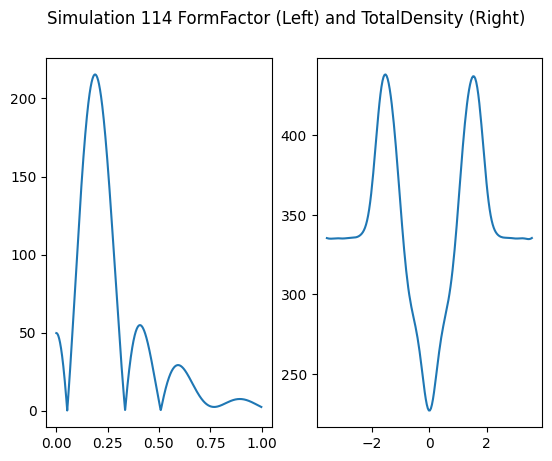

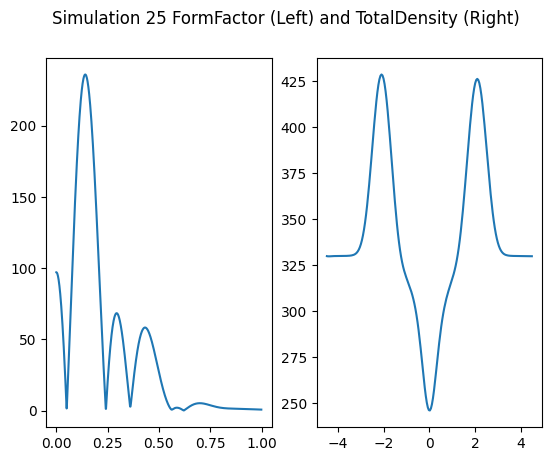

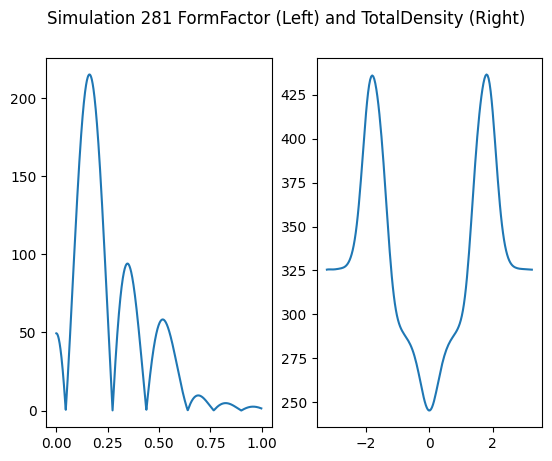

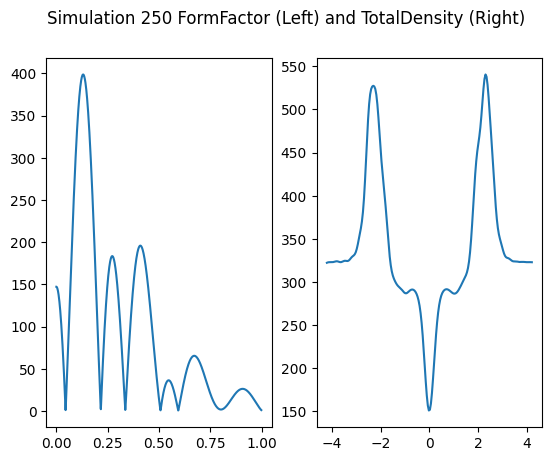

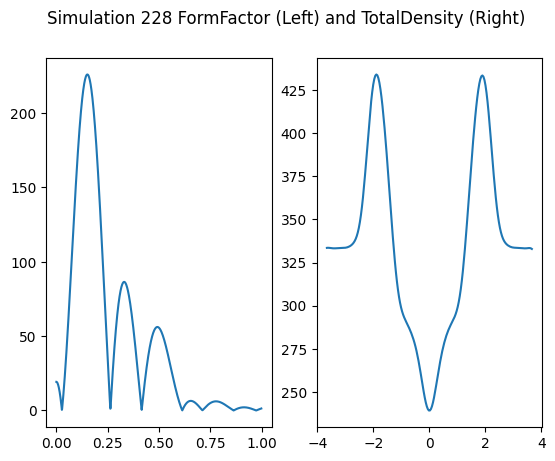

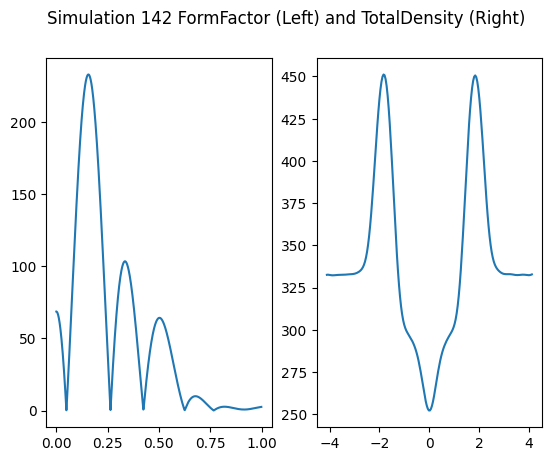

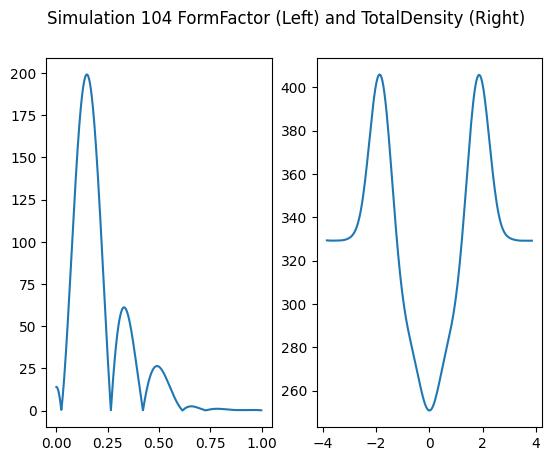

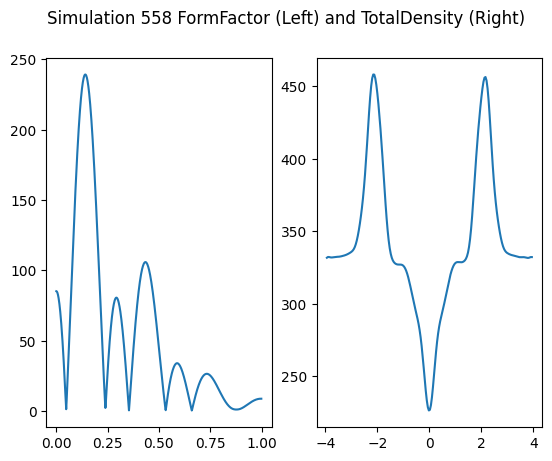

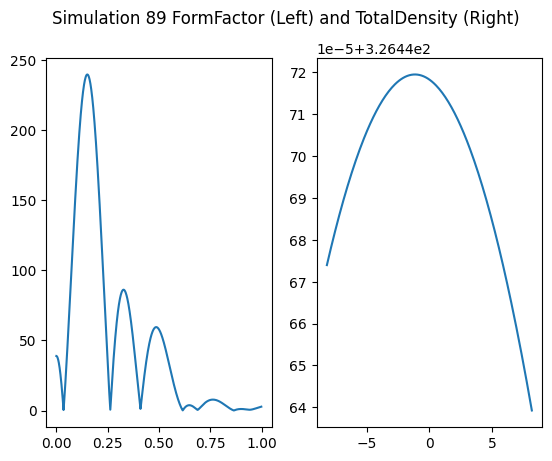

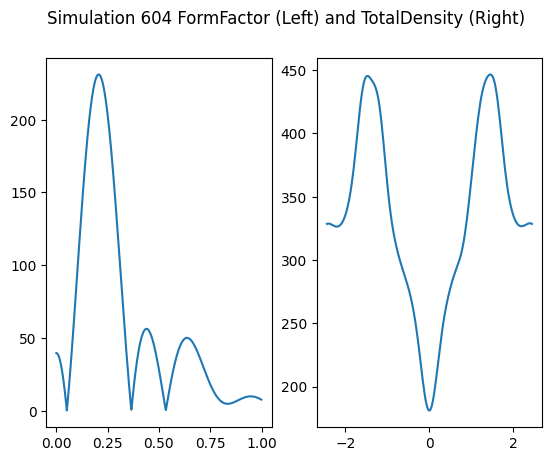

In [25]:
random.seed(42)
samples = random.sample(list(TD_x_df.columns),10)

for index in samples:
    plt.subplot(1, 2, 1)
    plt.plot([round(i * 0.001,4) for i in range(0, 1000,1)], FF_df[index])
    plt.subplot(1, 2, 2)
    plt.plot(TD_x_df[index],TD_y_df[index])
    plt.suptitle('Simulation ' + str(index) + ' FormFactor (Left) and TotalDensity (Right)')
    plt.show()

In [32]:
max_peaks, _ = find_peaks(FF_df[114])
min_peaks, _ = find_peaks(-FF_df[114])
print(FF_df[114][max_peaks])
print(FF_df[114][min_peaks])
print('')

max_peaks, _ = find_peaks(TD_y_df[114])
min_peaks, _ = find_peaks(-TD_y_df[114])
print(TD_y_df[114][max_peaks])
print(TD_y_df[114][min_peaks])

189    215.379081
408     54.804503
593     29.199402
894      7.466317
Name: 114, dtype: float64
53     0.115136
335    0.440915
509    0.390426
769    2.371694
Name: 114, dtype: float64

10     335.251811
57     437.912314
142    436.803600
189    335.244081
Name: 114, dtype: float64
4      334.980384
15     335.095884
100    227.302904
184    335.077676
196    334.727521
Name: 114, dtype: float64


Index 114
FormFactor peaks
53       0.115136
189    215.379081
335      0.440915
408     54.804503
509      0.390426
593     29.199402
769      2.371694
894      7.466317
Name: 114, dtype: float64
TotalDensity peaks
4      334.980384
10     335.251811
15     335.095884
57     437.912314
100    227.302904
142    436.803600
184    335.077676
189    335.244081
196    334.727521
Name: 114, dtype: float64


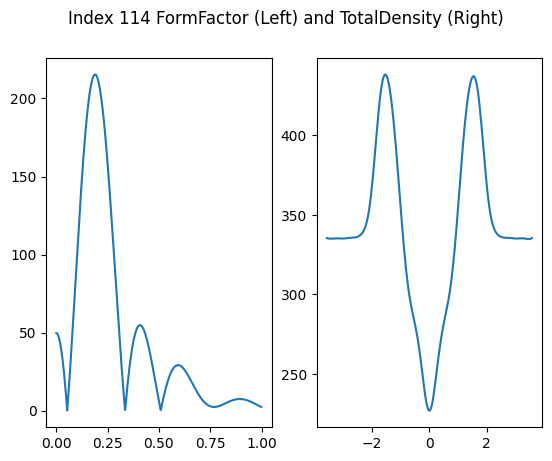


Index 25
FormFactor peaks
50       1.556561
141    235.930462
242      1.259188
294     68.401531
360      2.816436
432     58.343718
563      0.712957
587      2.081776
621      0.129366
699      5.238412
Name: 25, dtype: float64
TotalDensity peaks
2      329.602471
8      329.764707
11     329.756499
53     428.450943
100    245.841613
146    426.058577
195    329.702838
197    329.706185
Name: 25, dtype: float64


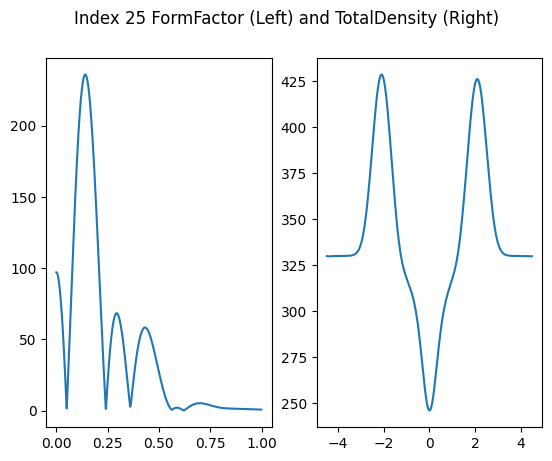


Index 281
FormFactor peaks
46       0.490302
161    215.115267
274      0.092354
347     94.071937
439      0.525308
519     58.298918
640      0.244401
692      9.682468
767      0.143453
825      4.752769
901      0.038865
959      2.490804
Name: 281, dtype: float64
TotalDensity peaks
2      325.615958
5      325.570543
44     435.897302
99     245.379445
155    436.458044
Name: 281, dtype: float64


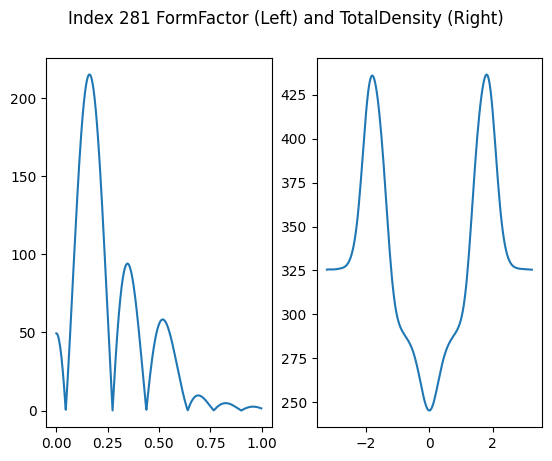


Index 250
FormFactor peaks
45       1.133330
131    398.603460
217      2.193151
272    183.522179
336      1.346676
409    195.905645
508      0.894613
547     36.423810
594      0.684801
672     65.442729
802      1.796729
908     26.311931
Name: 250, dtype: float64
TotalDensity peaks
3      323.018667
5      322.979302
10     323.976348
13     322.989404
18     324.568558
20     324.283397
45     527.376887
77     286.885046
83     291.276100
99     151.075279
116    291.611481
124    286.469331
154    540.512704
182    323.869211
183    323.895383
188    323.188375
190    323.325059
194    322.977972
196    323.049139
Name: 250, dtype: float64


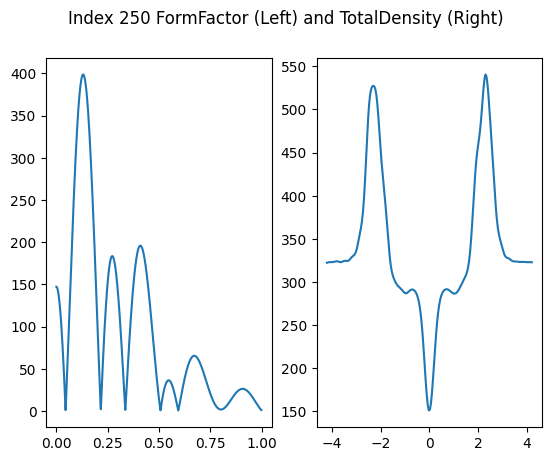


Index 228
FormFactor peaks
27       0.412818
151    225.837876
263      1.219415
331     86.427180
416      0.451807
492     56.129977
614      0.102204
655      6.467963
712      0.191215
778      6.155891
864      0.021533
915      2.145632
974      0.011774
Name: 228, dtype: float64
TotalDensity peaks
1      333.565384
7      333.228193
48     434.060549
100    239.199669
151    433.489843
192    333.218626
196    333.399965
Name: 228, dtype: float64


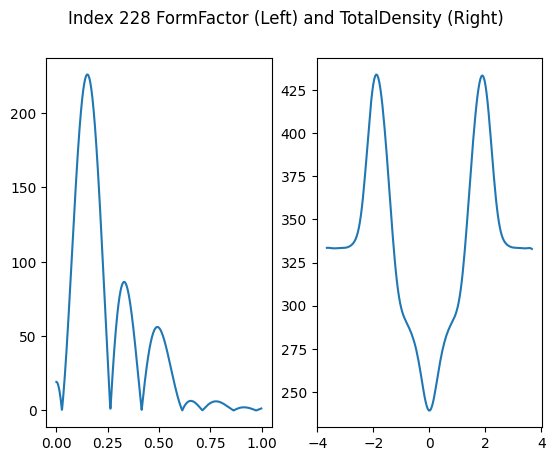


Index 142
FormFactor peaks
49       0.178093
156    233.238976
264      0.355137
335    103.563216
424      0.669682
503     64.330776
626      0.260982
678      9.939179
767      0.030229
820      2.644807
916      0.685381
Name: 142, dtype: float64
TotalDensity peaks
1      332.601603
6      332.216831
55     451.194810
100    252.151945
144    450.630483
174    332.898618
177    332.923336
185    332.358791
190    332.605939
196    332.298651
Name: 142, dtype: float64


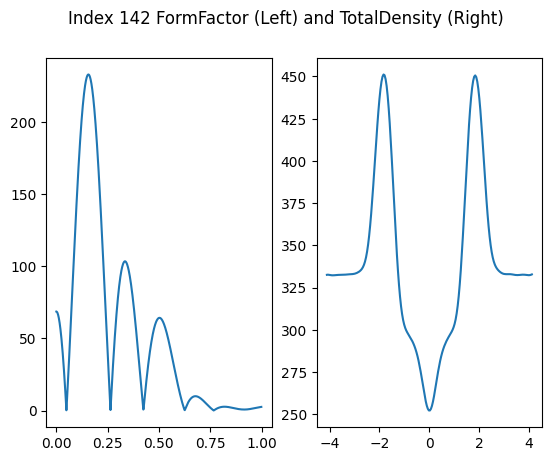


Index 104
FormFactor peaks
24       0.410848
149    199.136623
266      0.244869
330     61.156378
422      0.175024
491     26.394660
615      0.057348
658      2.519963
728      0.157769
783      1.067113
886      0.281561
946      0.407608
Name: 104, dtype: float64
TotalDensity peaks
5      329.228783
51     405.946644
100    250.806753
148    405.772689
190    329.200432
196    329.253210
Name: 104, dtype: float64


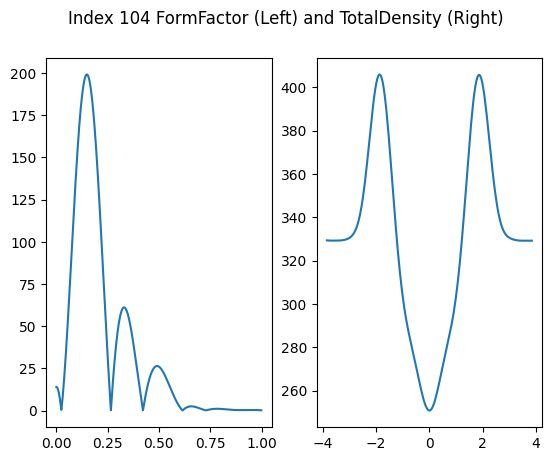


Index 558
FormFactor peaks
48       1.335264
141    239.284139
239      2.243906
293     80.639654
354      0.525330
434    105.923577
533      0.641260
589     34.028477
660      0.425305
733     26.493870
877      1.088735
997      8.793027
Name: 558, dtype: float64
TotalDensity peaks
1      332.316642
4      332.000925
45     458.069597
70     327.096489
71     327.105318
99     226.568417
127    328.810941
130    328.623416
154    456.310282
188    332.150306
190    332.209025
195    331.679346
198    332.273272
Name: 558, dtype: float64


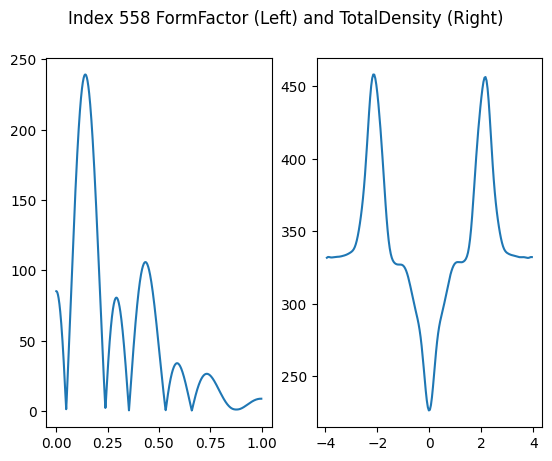


Index 89
FormFactor peaks
35       0.365742
151    239.927316
263      0.602970
328     86.249688
410      1.182527
487     59.552464
616      0.107401
648      3.791685
688      0.442780
763      7.789227
865      0.026546
901      1.084545
942      0.538942
Name: 89, dtype: float64
TotalDensity peaks
85    326.440719
Name: 89, dtype: float64


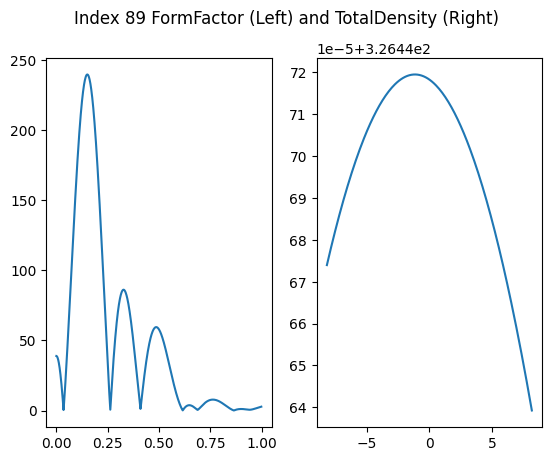


Index 604
FormFactor peaks
51       0.177308
206    231.066033
366      0.771120
440     56.284460
534      0.501826
637     50.080207
835      4.756935
947      9.902345
Name: 604, dtype: float64
TotalDensity peaks
1      328.747349
10     326.360783
39     445.383266
99     181.116180
159    446.535435
189    326.638812
197    329.035338
Name: 604, dtype: float64


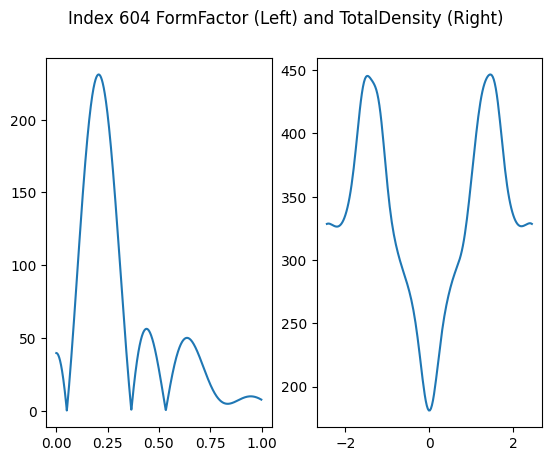

In [3]:
random.seed(42)
for index in random.sample(list(TD_x_df.columns),10):
    max_peaks_FF, _ = find_peaks(FF_df[index])
    min_peaks_FF, _ = find_peaks(-FF_df[index])
    max_peaks_TD, _ = find_peaks(TD_y_df[index])
    min_peaks_TD, _ = find_peaks(-TD_y_df[index])
    
    FF_peak_index = np.hstack((max_peaks_FF, min_peaks_FF))
    FF_peak_index.sort()
    FF_peak_value = FF_df[index][FF_peak_index]
    
    print('Index ' + str(index))
    
    #print(FF_peak_index)
    print('FormFactor peaks')
    print(FF_peak_value)
    
    TD_peak_index = np.hstack((max_peaks_TD, min_peaks_TD))
    TD_peak_index.sort()
    TD_peak_value = TD_y_df[index][TD_peak_index]
    
    #print(TD_peak_index)
    print('TotalDensity peaks')
    print(TD_peak_value)
    
    #plt.subplot(1, 2, 1)
    #plt.plot([round(i * 0.001,4) for i in range(0, 1000,1)], FF_df[index])
    #plt.subplot(1, 2, 2)
    #plt.plot(TD_x_df[index],TD_y_df[index])
    #plt.suptitle('Index ' + str(index) + ' FormFactor (Left) and TotalDensity (Right)')
    #plt.show()
    
    #print('')

In [3]:
names = []
for index in FF_df.columns:
    names.append(str(index) + 'i')
    names.append(str(index) + 'v')

FF_peak_df = pd.DataFrame(index=range(23), columns=names)
TD_peak_df = pd.DataFrame(index=range(41), columns=names)

FF_largest_amount = 0
TD_largest_amount = 0

for index in FF_df.columns:
    max_peaks_FF, _ = find_peaks(FF_df[index])
    min_peaks_FF, _ = find_peaks(-FF_df[index])
    
    FF_peak_index = np.hstack((max_peaks_FF, min_peaks_FF))
    FF_peak_index.sort()
    FF_peak_value = FF_df[index][FF_peak_index]
    
    if FF_largest_amount < len(FF_peak_index):
        FF_largest_amount = len(FF_peak_index)
    
    FF_peak_df[str(index) + 'i'] = pd.Series(FF_peak_index)
    FF_peak_df[str(index) + 'v'] = pd.Series(list(FF_peak_value))
    
    max_peaks_TD, _ = find_peaks(TD_y_df[index])
    min_peaks_TD, _ = find_peaks(-TD_y_df[index])
    
    TD_peak_index = np.hstack((max_peaks_TD, min_peaks_TD))
    TD_peak_index.sort()
    TD_peak_value = TD_y_df[index][TD_peak_index]
    
    if TD_largest_amount < len(TD_peak_index):
        TD_largest_amount = len(TD_peak_index)
    
    TD_peak_df[str(index) + 'i'] = pd.Series(TD_peak_index)
    TD_peak_df[str(index) + 'v'] = pd.Series(list(TD_peak_value))
    
print(FF_largest_amount)
print(TD_largest_amount)

C:\Users\niila\AppData\Local\Temp\ipykernel_5232\3622603169.py:37: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  TD_peak_df[str(index) + 'v'] = pd.Series(list(TD_peak_value))


23
41


In [30]:
FF_peak_df

,0i,0v,1i,1v,2i,2v,3i,3v,4i,4v,...,608i,608v,609i,609v,610i,610v,611i,611v,612i,612v
0,55.0,1.642677,29.0,0.230294,47.0,0.634862,44.0,0.617265,29.0,0.505949,...,54.0,0.372514,30.0,0.473393,30.0,0.293642,48.0,0.765778,45.0,0.526478
1,143.0,331.330438,149.0,231.824996,155.0,265.186571,162.0,206.696496,140.0,237.803138,...,147.0,279.206894,144.0,207.517433,151.0,222.518145,143.0,217.776912,170.0,232.662970
2,237.0,1.892465,260.0,0.560469,262.0,1.491681,278.0,1.383059,245.0,0.582451,...,248.0,1.053632,247.0,2.223680,262.0,3.511012,252.0,1.276767,296.0,0.752603
3,300.0,150.251758,328.0,91.700922,331.0,113.449338,347.0,79.833498,301.0,76.967218,...,310.0,109.945567,313.0,94.706592,330.0,88.081391,309.0,57.761874,368.0,80.615339
4,377.0,1.226568,414.0,1.599710,417.0,0.516610,437.0,2.226908,366.0,0.852871,...,388.0,1.484522,390.0,6.102914,413.0,6.194779,393.0,2.400687,460.0,0.545327
5,449.0,109.910837,497.0,67.440547,494.0,74.661154,515.0,46.521243,445.0,83.615978,...,461.0,75.948629,467.0,80.839946,493.0,64.524031,465.0,28.881169,544.0,53.867489
6,556.0,0.825910,623.0,0.096372,616.0,0.313041,653.0,0.206025,555.0,0.101388,...,572.0,1.208470,570.0,4.795210,618.0,1.954699,617.0,0.197200,690.0,0.034209
7,597.0,16.951412,678.0,11.282299,660.0,8.976489,689.0,2.730664,597.0,12.843224,...,618.0,12.319759,618.0,19.371972,660.0,7.392035,653.0,1.181773,713.0,1.678701
8,648.0,0.506061,759.0,0.277671,720.0,0.093960,734.0,1.647486,653.0,0.155234,...,682.0,0.403518,680.0,3.915188,713.0,2.637676,709.0,0.262701,739.0,0.173133
9,719.0,22.313741,849.0,8.503053,785.0,7.255117,791.0,2.777661,720.0,13.395769,...,747.0,8.845803,746.0,17.987158,784.0,8.810435,762.0,0.761384,840.0,11.766618


In [31]:
TD_peak_df

,0i,0v,1i,1v,2i,2v,3i,3v,4i,4v,...,608i,608v,609i,609v,610i,610v,611i,611v,612i,612v
0,7.0,333.965144,4.0,333.739810,5.0,340.114266,3.0,334.099749,2.0,333.446321,...,3.0,330.455435,1.0,329.448368,4.0,331.378835,3.0,329.813347,3.0,326.721055
1,8.0,333.963460,9.0,334.148632,7.0,340.120642,8.0,334.243482,8.0,333.168206,...,55.0,466.446918,5.0,328.639383,10.0,331.093432,6.0,329.780676,9.0,324.959103
2,47.0,508.929154,15.0,333.711850,11.0,340.079333,16.0,333.576569,45.0,435.579064,...,100.0,242.477164,16.0,329.914008,16.0,331.384300,53.0,415.827552,18.0,326.820946
3,99.0,230.987035,56.0,442.551943,48.0,471.303945,23.0,334.041559,99.0,221.933150,...,145.0,463.403600,21.0,329.289711,19.0,331.302602,100.0,257.674756,22.0,326.484942
4,152.0,508.059971,99.0,235.533814,100.0,242.445856,30.0,332.793016,154.0,435.988620,...,193.0,330.419034,26.0,331.437136,53.0,430.938614,146.0,413.414522,51.0,439.799226
5,NaN,NaN,144.0,445.928452,151.0,472.004743,54.0,433.482049,193.0,333.262786,...,197.0,330.465254,30.0,330.490625,99.0,235.148768,193.0,329.761805,99.0,217.757346
6,NaN,NaN,183.0,333.686445,185.0,340.121656,100.0,252.663148,198.0,333.428262,...,NaN,NaN,45.0,437.751895,147.0,441.307983,197.0,329.805961,148.0,439.516370
7,NaN,NaN,188.0,334.041065,189.0,340.143311,145.0,430.729863,NaN,NaN,...,NaN,NaN,100.0,241.927876,168.0,332.017886,NaN,NaN,179.0,326.382972
8,NaN,NaN,193.0,333.677581,192.0,340.108896,171.0,333.038134,NaN,NaN,...,NaN,NaN,121.0,294.008711,171.0,332.421795,NaN,NaN,183.0,326.456213
9,NaN,NaN,197.0,333.876643,197.0,340.287847,179.0,333.851248,NaN,NaN,...,NaN,NaN,124.0,292.857946,178.0,331.162331,NaN,NaN,192.0,325.436475


In [35]:
FF_peak_df.isna().sum(axis=0).value_counts()

10    424
11    396
12    202
9      76
13     68
15     26
14     22
16      4
8       4
0       2
5       2
dtype: int64

In [36]:
TD_peak_df.isna().sum(axis=0).value_counts()

34    144
30    118
36    116
32    110
33    102
31     82
35     78
37     70
38     66
28     62
29     54
26     34
27     26
25     24
24     20
22     20
40     16
16     12
23     10
21      8
11      6
14      6
41      6
15      4
6       4
8       4
10      4
4       4
13      2
2       2
9       2
19      2
20      2
5       2
0       2
18      2
dtype: int64

In [59]:
n_nans = FF_peak_df.isna().sum(axis=0)
col_names = n_nans[n_nans == 10].index
FF_peak_filtered = FF_peak_df[col_names]
TD_peak_filtered = TD_peak_df[col_names]

In [41]:
FF_peak_filtered

,0i,0v,2i,2v,3i,3v,7i,7v,11i,11v,...,591i,591v,605i,605v,608i,608v,610i,610v,611i,611v
0,55.0,1.642677,47.0,0.634862,44.0,0.617265,33.0,0.209643,53.0,0.882934,...,19.0,0.145789,24.0,0.062958,54.0,0.372514,30.0,0.293642,48.0,0.765778
1,143.0,331.330438,155.0,265.186571,162.0,206.696496,150.0,248.577364,153.0,255.872025,...,151.0,227.087388,149.0,225.557643,147.0,279.206894,151.0,222.518145,143.0,217.776912
2,237.0,1.892465,262.0,1.491681,278.0,1.383059,258.0,0.389830,255.0,1.215462,...,263.0,0.088892,262.0,0.441330,248.0,1.053632,262.0,3.511012,252.0,1.276767
3,300.0,150.251758,331.0,113.449338,347.0,79.833498,322.0,96.528968,325.0,120.311084,...,331.0,90.984850,328.0,80.494181,310.0,109.945567,330.0,88.081391,309.0,57.761874
4,377.0,1.226568,417.0,0.516610,437.0,2.226908,402.0,0.738308,414.0,0.923539,...,415.0,0.133811,414.0,0.447959,388.0,1.484522,413.0,6.194779,393.0,2.400687
5,449.0,109.910837,494.0,74.661154,515.0,46.521243,480.0,73.050031,491.0,72.683956,...,492.0,61.492041,489.0,47.560846,461.0,75.948629,493.0,64.524031,465.0,28.881169
6,556.0,0.825910,616.0,0.313041,653.0,0.206025,609.0,0.470907,608.0,0.717249,...,613.0,0.055936,616.0,0.113703,572.0,1.208470,618.0,1.954699,617.0,0.197200
7,597.0,16.951412,660.0,8.976489,689.0,2.730664,637.0,3.941491,665.0,14.882892,...,655.0,7.200726,654.0,3.977014,618.0,12.319759,660.0,7.392035,653.0,1.181773
8,648.0,0.506061,720.0,0.093960,734.0,1.647486,672.0,0.152695,755.0,0.157753,...,712.0,0.221719,707.0,0.027639,682.0,0.403518,713.0,2.637676,709.0,0.262701
9,719.0,22.313741,785.0,7.255117,791.0,2.777661,750.0,11.485842,810.0,4.391416,...,779.0,7.073646,772.0,3.839792,747.0,8.845803,784.0,8.810435,762.0,0.761384


In [43]:
TD_peak_filtered.isna().sum(axis=0).value_counts()

34    60
36    58
33    46
32    44
35    36
30    36
31    34
37    24
38    18
29    12
40    10
26     8
27     8
28     8
21     4
14     4
25     4
20     2
24     2
23     2
10     2
22     2
dtype: int64

In [60]:
n_nans = TD_peak_filtered.isna().sum(axis=0)
col_names = n_nans[n_nans == 34].index
FF_peak_filtered = FF_peak_df[col_names]
TD_peak_filtered = TD_peak_filtered[col_names]

In [47]:
FF_peak_filtered

,28i,28v,44i,44v,54i,54v,91i,91v,92i,92v,...,488i,488v,564i,564v,578i,578v,584i,584v,611i,611v
0,34.0,0.475125,22.0,0.107290,46.0,0.453957,55.0,0.992347,54.0,0.321807,...,50.0,1.300113,26.0,0.975805,46.0,1.354344,27.0,0.620094,48.0,0.765778
1,150.0,232.506149,150.0,227.257216,155.0,261.218797,158.0,228.105053,150.0,262.691529,...,151.0,235.565871,147.0,181.149400,155.0,210.031256,149.0,217.900121,143.0,217.776912
2,259.0,2.788552,263.0,0.659069,264.0,0.675847,269.0,0.373322,254.0,1.573965,...,256.0,0.380238,263.0,2.940143,264.0,1.698406,263.0,1.206443,252.0,1.276767
3,325.0,89.293180,330.0,87.048601,333.0,110.577547,335.0,82.795342,317.0,96.912825,...,315.0,81.352431,314.0,41.936710,330.0,82.832375,328.0,71.860115,309.0,57.761874
4,407.0,4.402605,415.0,0.343258,419.0,0.612893,422.0,0.262609,400.0,1.973796,...,386.0,0.865902,375.0,0.311028,412.0,1.525247,415.0,0.971136,393.0,2.400687
5,484.0,61.411427,491.0,57.426202,497.0,72.738009,496.0,47.600525,472.0,57.929901,...,464.0,77.740335,458.0,54.460178,491.0,59.350911,487.0,38.630227,465.0,28.881169
6,610.0,0.987461,613.0,0.076982,618.0,0.162385,623.0,0.102993,587.0,1.171751,...,580.0,0.222731,566.0,1.396756,610.0,0.123759,614.0,0.258527,617.0,0.197200
7,643.0,4.424490,654.0,6.387093,661.0,8.906986,661.0,4.022019,632.0,8.061315,...,621.0,9.979821,619.0,12.591751,660.0,9.282106,651.0,3.042429,653.0,1.181773
8,682.0,1.878524,710.0,0.084495,722.0,0.192390,715.0,0.087207,700.0,0.636381,...,673.0,0.154759,696.0,0.189344,734.0,0.530062,706.0,0.301731,709.0,0.262701
9,755.0,8.417433,776.0,6.388798,786.0,7.242236,780.0,3.894629,762.0,5.029098,...,740.0,11.406482,755.0,6.109129,792.0,4.289717,769.0,2.683535,762.0,0.761384


In [45]:
TD_peak_filtered

,28i,28v,44i,44v,54i,54v,91i,91v,92i,92v,...,488i,488v,564i,564v,578i,578v,584i,584v,611i,611v
0,1.0,336.316611,7.0,335.122726,2.0,340.710832,1.0,328.957835,3.0,329.323083,...,3.0,325.755425,3.0,333.366461,2.0,328.403589,4.0,333.611567,3.0,329.813347
1,4.0,336.123281,10.0,335.116792,3.0,340.706970,5.0,328.907604,4.0,329.320673,...,6.0,325.656719,8.0,333.233905,7.0,328.145909,11.0,333.175945,6.0,329.780676
2,11.0,336.619592,48.0,435.053786,50.0,469.754014,53.0,437.000991,53.0,449.913619,...,40.0,436.787969,47.0,408.715473,47.0,429.670416,50.0,420.630950,53.0,415.827552
3,14.0,336.486223,100.0,238.279428,100.0,243.696533,99.0,251.831368,99.0,247.476826,...,99.0,228.870472,99.0,245.922454,99.0,248.109025,100.0,245.938241,100.0,257.674756
4,44.0,442.751816,151.0,434.931492,149.0,469.011710,146.0,437.422644,146.0,452.861091,...,159.0,437.443361,151.0,407.182304,152.0,430.657332,149.0,421.900606,146.0,413.414522
5,100.0,239.310830,192.0,335.083571,193.0,340.634969,192.0,328.922046,194.0,329.304350,...,190.0,325.652881,192.0,333.272550,193.0,328.224501,188.0,333.277676,193.0,329.761805
6,154.0,436.789632,196.0,335.095021,197.0,340.779302,197.0,328.965621,196.0,329.312048,...,194.0,325.813178,197.0,333.342704,197.0,328.371083,192.0,333.328936,197.0,329.805961
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
input_data = FF_peak_filtered.iloc[:13]
output_data = TD_peak_filtered.iloc[:7]

NameError: name 'FF_peak_filtered' is not defined

In [54]:
input_data

,28i,28v,44i,44v,54i,54v,91i,91v,92i,92v,...,488i,488v,564i,564v,578i,578v,584i,584v,611i,611v
0,34.0,0.475125,22.0,0.107290,46.0,0.453957,55.0,0.992347,54.0,0.321807,...,50.0,1.300113,26.0,0.975805,46.0,1.354344,27.0,0.620094,48.0,0.765778
1,150.0,232.506149,150.0,227.257216,155.0,261.218797,158.0,228.105053,150.0,262.691529,...,151.0,235.565871,147.0,181.149400,155.0,210.031256,149.0,217.900121,143.0,217.776912
2,259.0,2.788552,263.0,0.659069,264.0,0.675847,269.0,0.373322,254.0,1.573965,...,256.0,0.380238,263.0,2.940143,264.0,1.698406,263.0,1.206443,252.0,1.276767
3,325.0,89.293180,330.0,87.048601,333.0,110.577547,335.0,82.795342,317.0,96.912825,...,315.0,81.352431,314.0,41.936710,330.0,82.832375,328.0,71.860115,309.0,57.761874
4,407.0,4.402605,415.0,0.343258,419.0,0.612893,422.0,0.262609,400.0,1.973796,...,386.0,0.865902,375.0,0.311028,412.0,1.525247,415.0,0.971136,393.0,2.400687
5,484.0,61.411427,491.0,57.426202,497.0,72.738009,496.0,47.600525,472.0,57.929901,...,464.0,77.740335,458.0,54.460178,491.0,59.350911,487.0,38.630227,465.0,28.881169
6,610.0,0.987461,613.0,0.076982,618.0,0.162385,623.0,0.102993,587.0,1.171751,...,580.0,0.222731,566.0,1.396756,610.0,0.123759,614.0,0.258527,617.0,0.197200
7,643.0,4.424490,654.0,6.387093,661.0,8.906986,661.0,4.022019,632.0,8.061315,...,621.0,9.979821,619.0,12.591751,660.0,9.282106,651.0,3.042429,653.0,1.181773
8,682.0,1.878524,710.0,0.084495,722.0,0.192390,715.0,0.087207,700.0,0.636381,...,673.0,0.154759,696.0,0.189344,734.0,0.530062,706.0,0.301731,709.0,0.262701
9,755.0,8.417433,776.0,6.388798,786.0,7.242236,780.0,3.894629,762.0,5.029098,...,740.0,11.406482,755.0,6.109129,792.0,4.289717,769.0,2.683535,762.0,0.761384


In [55]:
output_data

,28i,28v,44i,44v,54i,54v,91i,91v,92i,92v,...,488i,488v,564i,564v,578i,578v,584i,584v,611i,611v
0,1.0,336.316611,7.0,335.122726,2.0,340.710832,1.0,328.957835,3.0,329.323083,...,3.0,325.755425,3.0,333.366461,2.0,328.403589,4.0,333.611567,3.0,329.813347
1,4.0,336.123281,10.0,335.116792,3.0,340.706970,5.0,328.907604,4.0,329.320673,...,6.0,325.656719,8.0,333.233905,7.0,328.145909,11.0,333.175945,6.0,329.780676
2,11.0,336.619592,48.0,435.053786,50.0,469.754014,53.0,437.000991,53.0,449.913619,...,40.0,436.787969,47.0,408.715473,47.0,429.670416,50.0,420.630950,53.0,415.827552
3,14.0,336.486223,100.0,238.279428,100.0,243.696533,99.0,251.831368,99.0,247.476826,...,99.0,228.870472,99.0,245.922454,99.0,248.109025,100.0,245.938241,100.0,257.674756
4,44.0,442.751816,151.0,434.931492,149.0,469.011710,146.0,437.422644,146.0,452.861091,...,159.0,437.443361,151.0,407.182304,152.0,430.657332,149.0,421.900606,146.0,413.414522
5,100.0,239.310830,192.0,335.083571,193.0,340.634969,192.0,328.922046,194.0,329.304350,...,190.0,325.652881,192.0,333.272550,193.0,328.224501,188.0,333.277676,193.0,329.761805
6,154.0,436.789632,196.0,335.095021,197.0,340.779302,197.0,328.965621,196.0,329.312048,...,194.0,325.813178,197.0,333.342704,197.0,328.371083,192.0,333.328936,197.0,329.805961


In [68]:
samples = set()
for index in output_data.columns:
    samples.add(int(index[:-1]))
    
samples = list(samples)
samples.sort()
print(samples)

[28, 44, 54, 91, 92, 117, 128, 158, 172, 206, 218, 228, 248, 262, 287, 290, 317, 344, 365, 409, 413, 457, 467, 475, 477, 488, 564, 578, 584, 611]


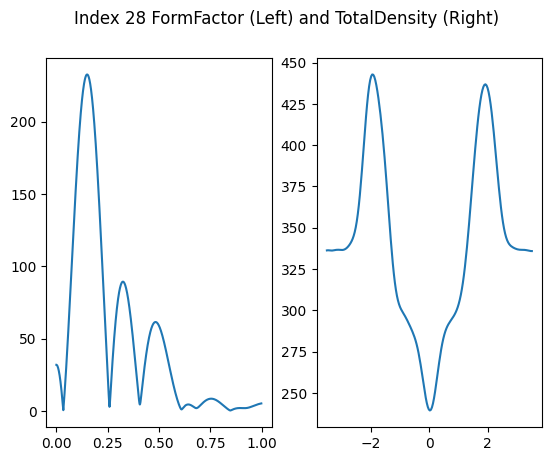

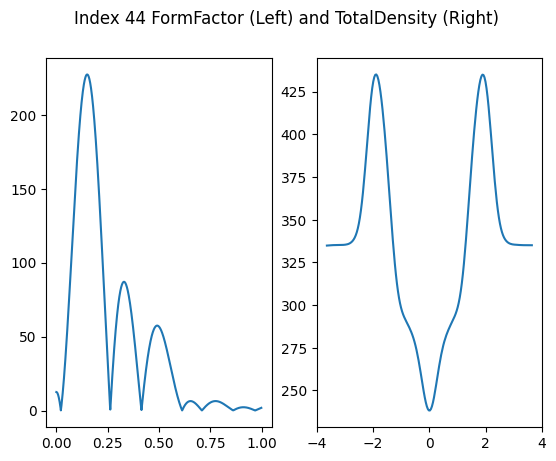

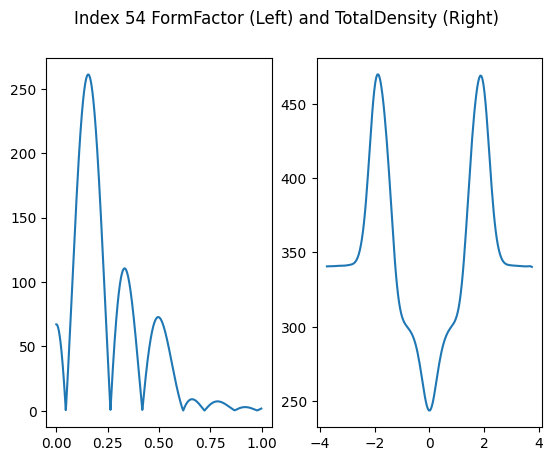

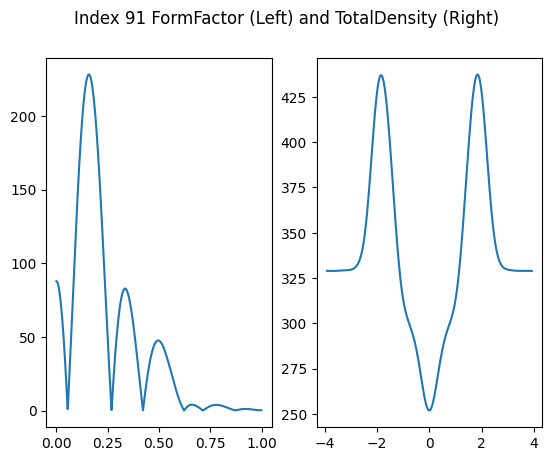

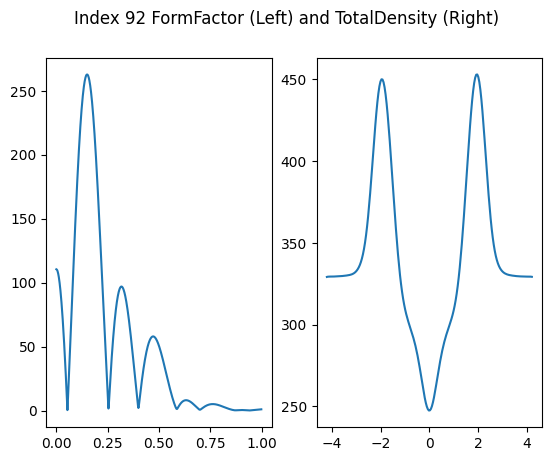

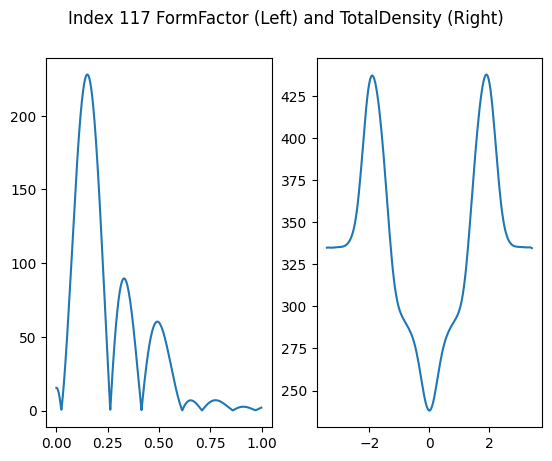

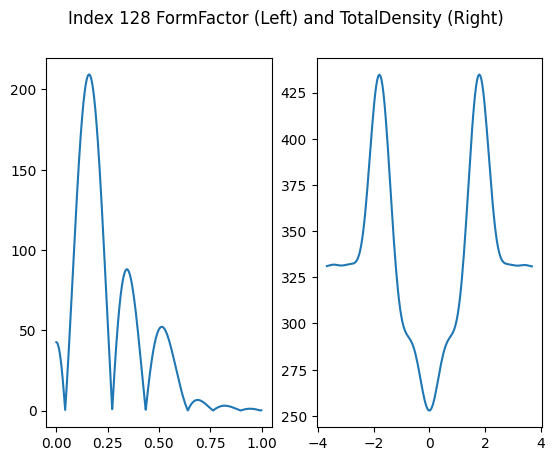

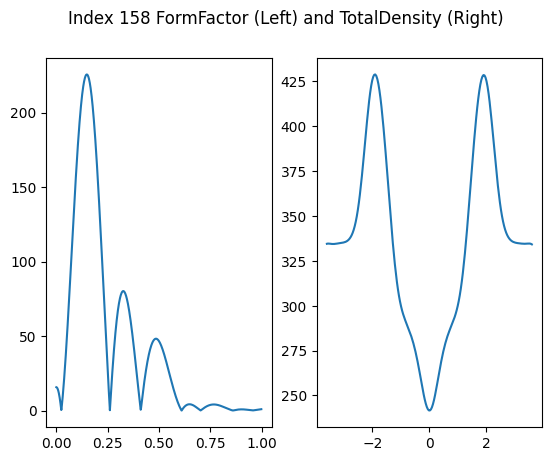

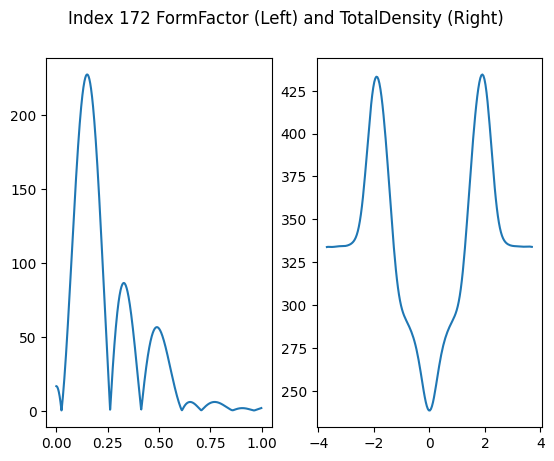

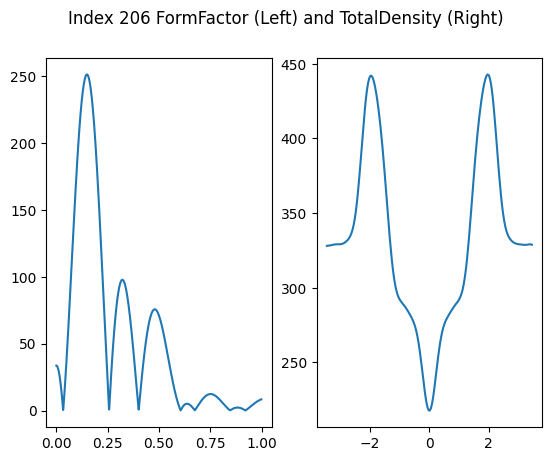

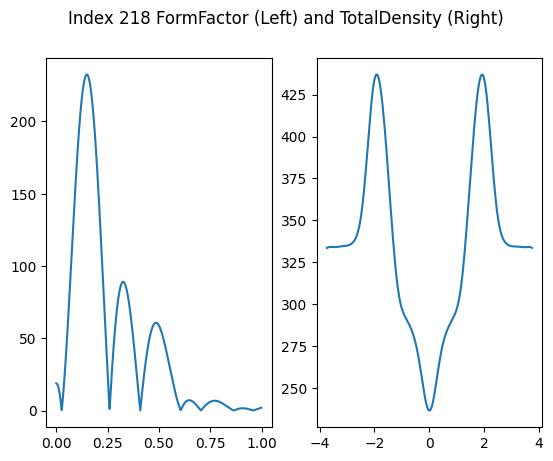

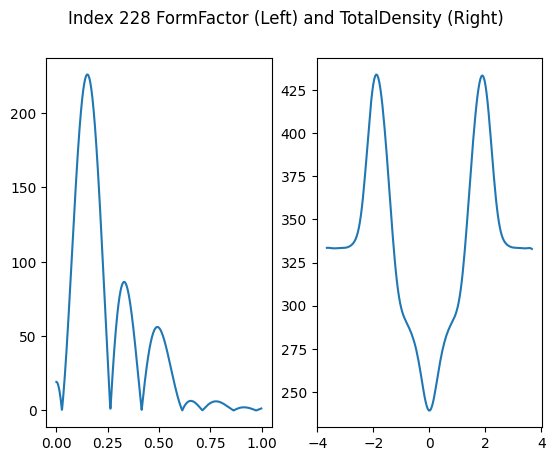

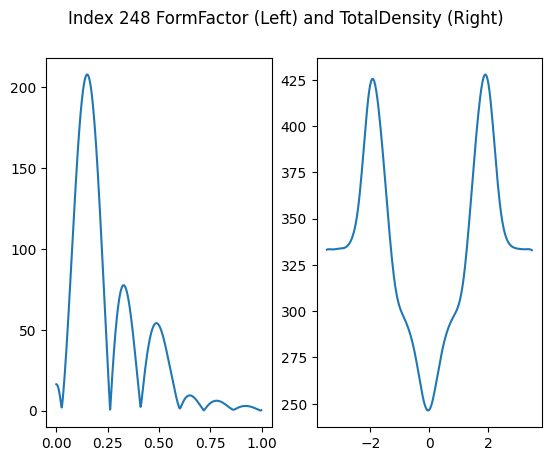

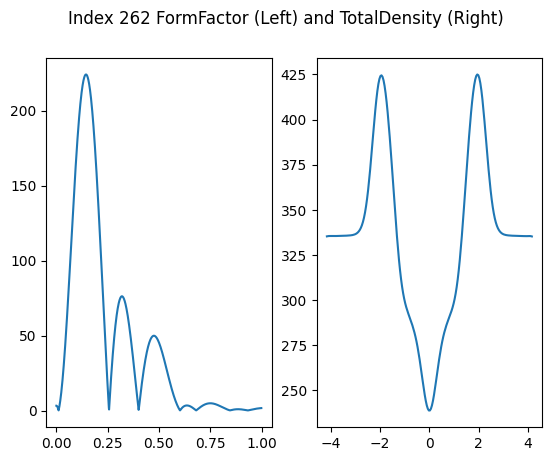

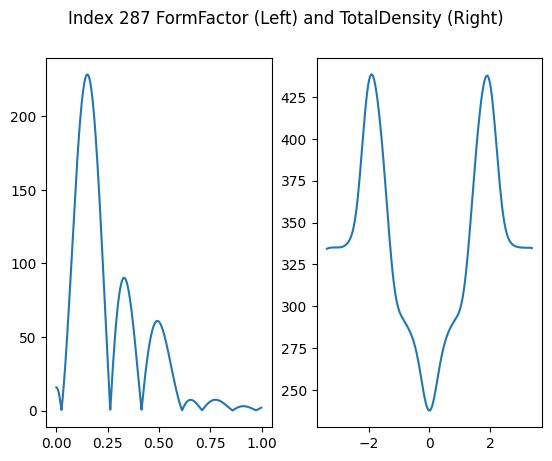

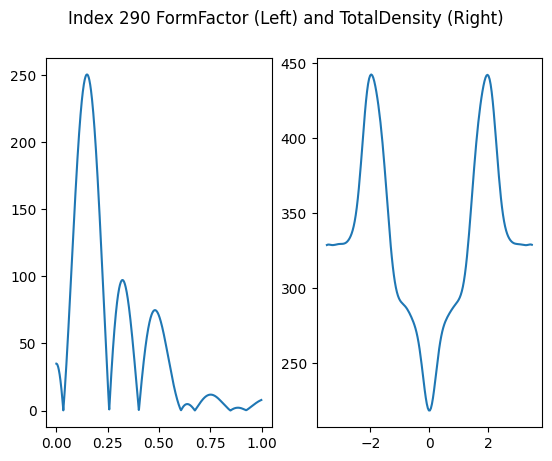

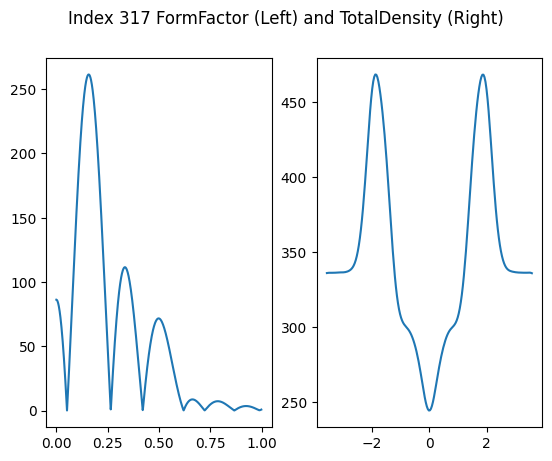

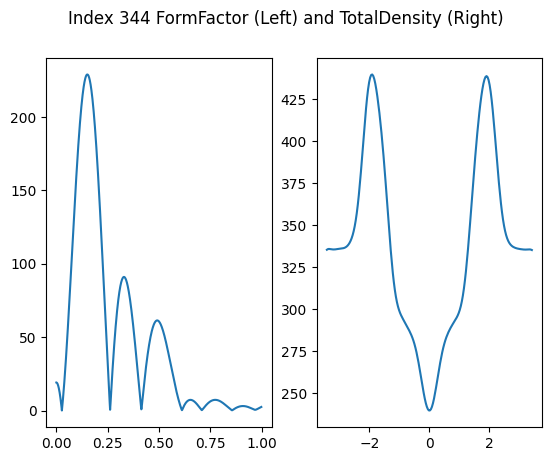

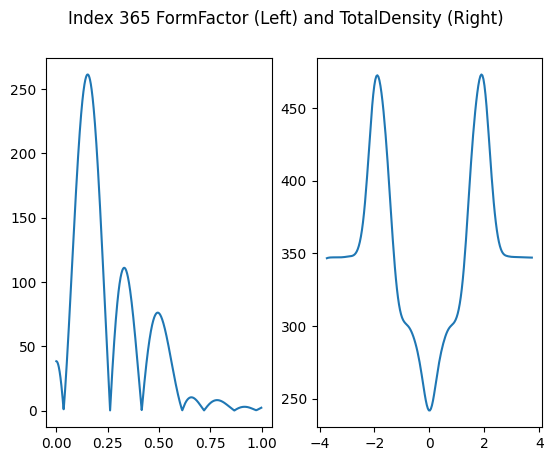

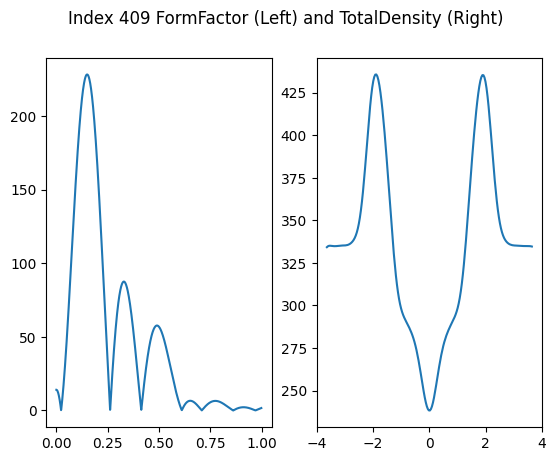

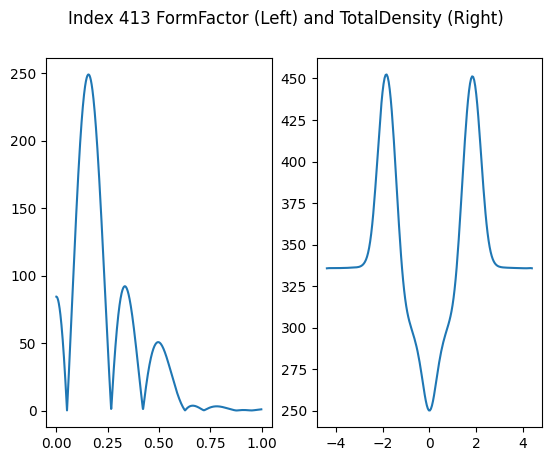

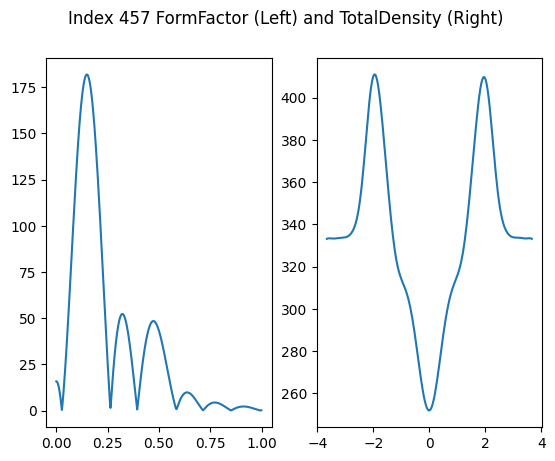

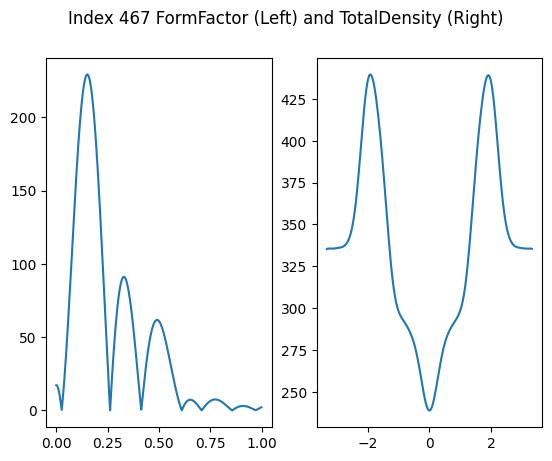

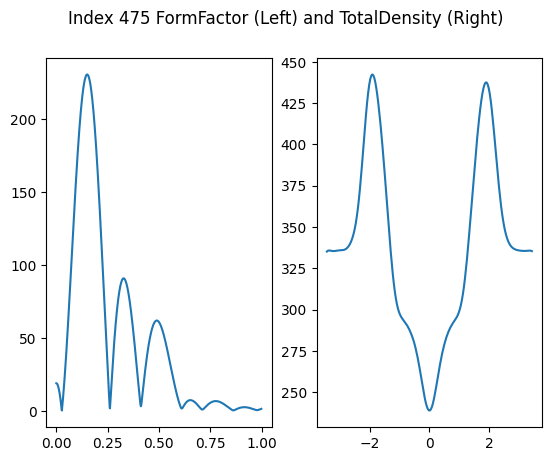

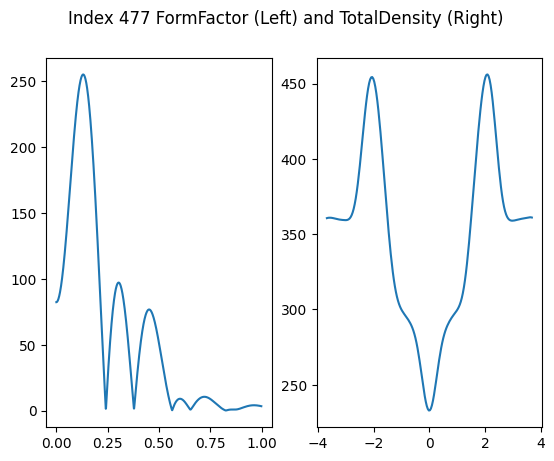

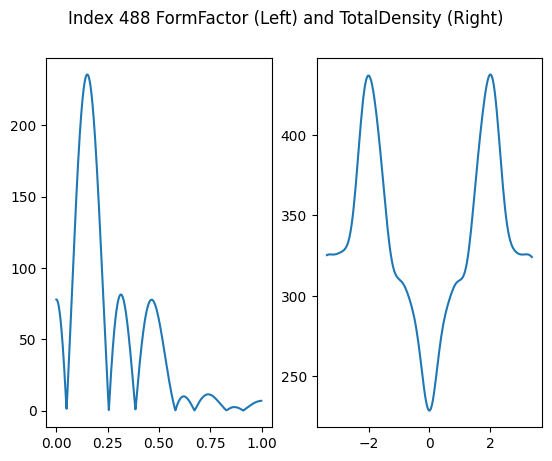

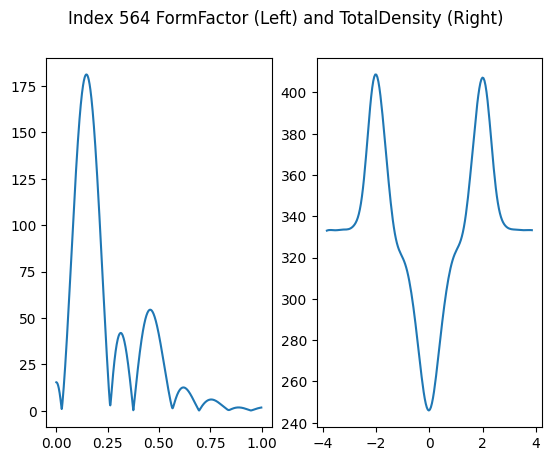

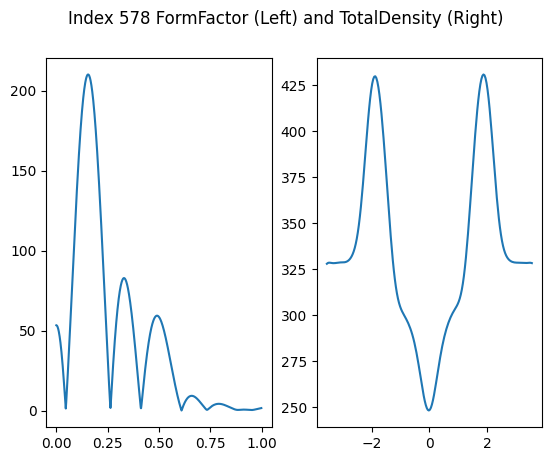

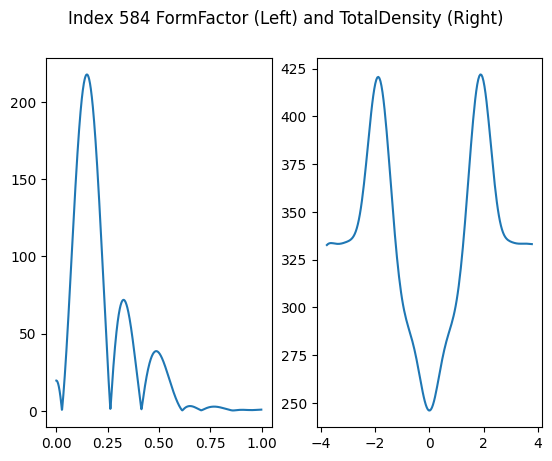

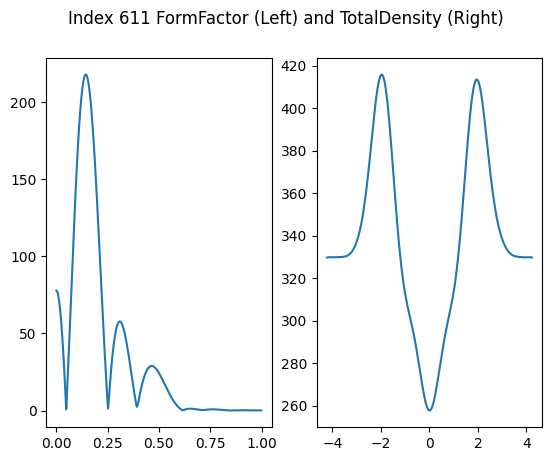

In [73]:
for index in samples:
    plt.subplot(1, 2, 1)
    plt.plot([round(i * 0.001,4) for i in range(0, 1000,1)], FF_df[index])
    plt.subplot(1, 2, 2)
    plt.plot(TD_x_df[index],TD_y_df[index])
    plt.suptitle('Index ' + str(index) + ' FormFactor (Left) and TotalDensity (Right)')
    plt.show()

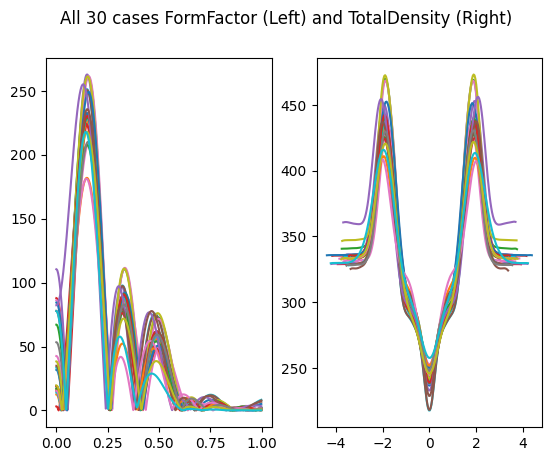

In [75]:
for index in samples:
    plt.subplot(1, 2, 1)
    plt.plot([round(i * 0.001,4) for i in range(0, 1000,1)], FF_df[index])
    plt.subplot(1, 2, 2)
    plt.plot(TD_x_df[index],TD_y_df[index])
    plt.suptitle('All 30 cases FormFactor (Left) and TotalDensity (Right)')
plt.show()

In [76]:
n_nans = FF_peak_df.isna().sum(axis=0)
col_names = n_nans[n_nans == 0].index
FF_peak_filtered = FF_peak_df[col_names]
TD_peak_filtered = TD_peak_df[col_names]

In [77]:
FF_peak_filtered

,277i,277v
0,36,1.524954
1,116,216.645553
2,224,0.726149
3,244,7.771869
4,267,2.419715
5,312,16.405495
6,357,2.115431
7,403,14.962943
8,461,0.371731
9,493,4.964595


In [78]:
TD_peak_filtered 

,277i,277v
0,39.0,379.314977
1,99.0,266.335245
2,163.0,381.343857
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN


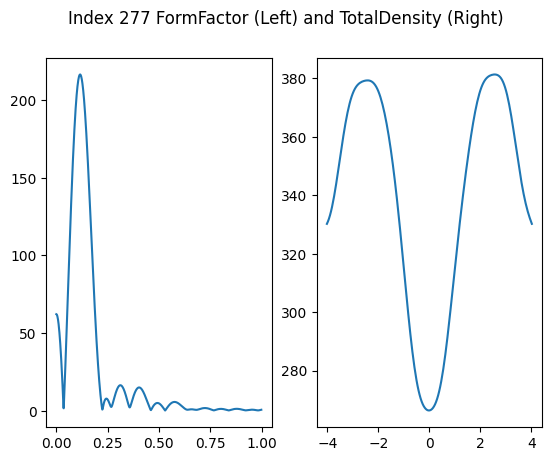

In [79]:
plt.subplot(1, 2, 1)
plt.plot([round(i * 0.001,4) for i in range(0, 1000,1)], FF_df[277])
plt.subplot(1, 2, 2)
plt.plot(TD_x_df[277],TD_y_df[277])
plt.suptitle('Index ' + str(277) + ' FormFactor (Left) and TotalDensity (Right)')
plt.show()

In [80]:
n_nans = TD_peak_df.isna().sum(axis=0)
col_names = n_nans[n_nans == 0].index
FF_peak_filtered = FF_peak_df[col_names]
TD_peak_filtered = TD_peak_df[col_names]

In [81]:
FF_peak_filtered

,355i,355v
0,62.0,2.553928
1,160.0,201.024332
2,303.0,22.923188
3,420.0,107.120509
4,527.0,0.113179
5,577.0,28.991242
6,635.0,2.985024
7,723.0,45.703127
8,876.0,8.653301
9,NaN,NaN


In [82]:
TD_peak_filtered

,355i,355v
0,3,323.509852
1,5,323.924526
2,9,323.559184
3,12,323.739797
4,16,323.401283
5,20,323.692487
6,23,323.570717
7,27,323.948175
8,31,323.342793
9,34,323.842778


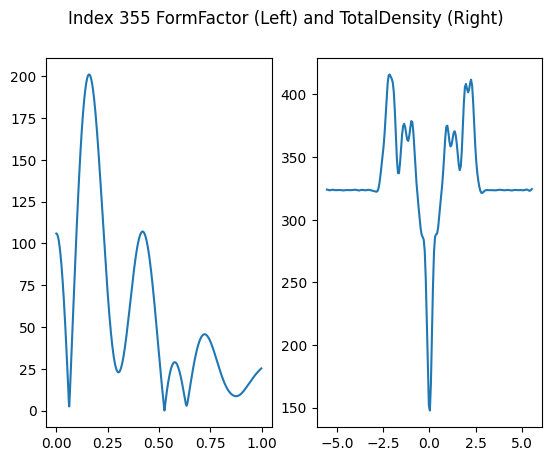

In [83]:
plt.subplot(1, 2, 1)
plt.plot([round(i * 0.001,4) for i in range(0, 1000,1)], FF_df[355])
plt.subplot(1, 2, 2)
plt.plot(TD_x_df[355],TD_y_df[355])
plt.suptitle('Index ' + str(355) + ' FormFactor (Left) and TotalDensity (Right)')
plt.show()

In [87]:
n_nans = FF_peak_df.isna().sum(axis=0)
col_names = n_nans[n_nans == 5].index
FF_peak_filtered = FF_peak_df[col_names]
TD_peak_filtered = TD_peak_df[col_names]

In [88]:
FF_peak_filtered

,392i,392v
0,47.0,1.023353
1,126.0,205.814996
2,241.0,8.751304
3,268.0,14.083904
4,320.0,4.168677
5,402.0,14.435655
6,541.0,1.011855
7,584.0,2.741358
8,642.0,0.781422
9,667.0,1.005847


In [89]:
TD_peak_filtered

,392i,392v
0,1.0,334.733088
1,48.0,396.626091
2,102.0,270.731883
3,159.0,390.119498
4,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN


In [8]:
n_nans = TD_peak_df.isna().sum(axis=0)
col_names = n_nans[n_nans == 2].index
FF_peak_filtered = FF_peak_df[col_names]
TD_peak_filtered = TD_peak_df[col_names]

#samples = set()
#for index in FF_peak_filtered.columns:
#    samples.add(int(index[:-1]))
    
#samples = list(samples)
#samples.sort()

#for index in samples:
#    plt.subplot(1, 2, 1)
#    plt.plot([round(i * 0.001,4) for i in range(0, 1000,1)], FF_df[index])
#    plt.subplot(1, 2, 2)
#    plt.plot(TD_x_df[index],TD_y_df[index])
#    plt.suptitle('All 30 cases FormFactor (Left) and TotalDensity (Right)')
#    plt.show()

In [9]:
FF_peak_filtered

,139i,139v
0,49.0,0.624935
1,147.0,249.934164
2,254.0,1.116409
3,297.0,54.087554
4,344.0,1.299362
5,433.0,132.601639
6,538.0,1.498176
7,583.0,27.706032
8,636.0,1.774422
9,719.0,45.310991


In [10]:
TD_peak_filtered

,139i,139v
0,1.0,323.361481
1,4.0,323.782864
2,8.0,323.376300
3,11.0,323.904247
4,15.0,323.482508
5,17.0,323.717987
6,20.0,323.440769
7,24.0,324.146637
8,28.0,323.523426
9,31.0,323.835597


In [97]:
FF_peak_df.isna().sum(axis=0).value_counts()

10    424
11    396
12    202
9      76
13     68
15     26
14     22
16      4
8       4
0       2
5       2
dtype: int64

In [11]:
n_nans = FF_peak_df.isna().sum(axis=0)
FF_peak_amounts = FF_peak_df.isna().sum(axis=0).value_counts().values
i = 0 
first_up = 0
first_down = 0
min_difference = 1000000
max_difference = 0
for nan_amount in FF_peak_df.isna().sum(axis=0).value_counts().index:
    col_names = n_nans[n_nans == nan_amount].index
    TD_filtered_df = TD_peak_df[col_names]
    #print(23-nan_amount,FF_peak_amounts[i]/2)
    #print('')
    TD_peak_amounts = TD_filtered_df.isna().sum(axis=0).value_counts().values 
    j = 0
    second_up = 0
    second_down = 0
    for second_nan_amount in TD_filtered_df.isna().sum(axis=0).value_counts().index:
        #print(41-second_nan_amount, TD_peak_amounts[j]/2)
        second_up = second_up + (41-second_nan_amount)*TD_peak_amounts[j]/2
        second_down = second_down + TD_peak_amounts[j]/2
        j = j + 1
    TD_average = second_up/second_down
    
    if abs((23-nan_amount)-TD_average) < min_difference:
        min_difference = abs((23-nan_amount)-TD_average)
        
    if abs((23-nan_amount)-TD_average) > max_difference:
        max_difference = abs((23-nan_amount)-TD_average)
    
    first_up = first_up + abs((23-nan_amount)-TD_average)*FF_peak_amounts[i]/2
    first_down = first_down + FF_peak_amounts[i]/2
    
    i = i + 1
    
difference_average = first_up/first_down

print(difference_average)
print(min_difference)
print(max_difference)

2.4518760195758555
0.6565656565656557
20.0
